# Data set Context

The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.

The California Cooperative Oceanic Fisheries Investigations (CalCOFI) are a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. The organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California. Today our focus has shifted to the study of the marine environment off the coast of California, the management of its living resources, and monitoring the indicators of El Nino and climate change. CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.

# Task  : 
In this project we investigate the relationship between water salinity and Other Features. Also we predict the change of salinity based on multiple features.

# Imorting All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error,max_error

**Importing Data Set** : 
Importing dataset from downloaded file on System using Pandas package

In [2]:
original_data = pd .read_csv(r"C:\Users\SS\Downloads\MDS Course files\Projects\Data Sets\Salinity\bottle.csv" )

C:\Users\SS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
original_data .head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This Shows Data has 74 columns. But we dont know the no. of entries. So, We find **SHAPE** of the data

In [4]:
original_data .shape

(864863, 74)

This dataset has 864863 enteries/rows and 74 features/columns

### Info on features/columns of the Data set

In [5]:
original_data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

Result of this code shows 65 features are of float data type , 5 are of int data type and 4 are objects.

### Statistical Information of the Data set

In [6]:
original_data .describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


# Null Values

In [7]:
original_data.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

Clearly there many features which have only nan values.
So we need drop these features which has more than 3,00,000 null values

In [8]:
# We drop columns/features with more than 300000 nan values

data_wo_null = original_data.dropna(axis = 'columns' , thresh = 500000)

In [9]:
# To check new shape of the data
data_wo_null.shape  

(864863, 35)

### Now we drop null values from rows

In [10]:
data_wo_nan = data_wo_null.dropna()

In [11]:
data_wo_nan.shape

(299536, 35)

# Correlation 

We find correlation between features which have numerical values or which are not object dtypes.

In [12]:
cont_features = data_wo_nan.select_dtypes(exclude='object')

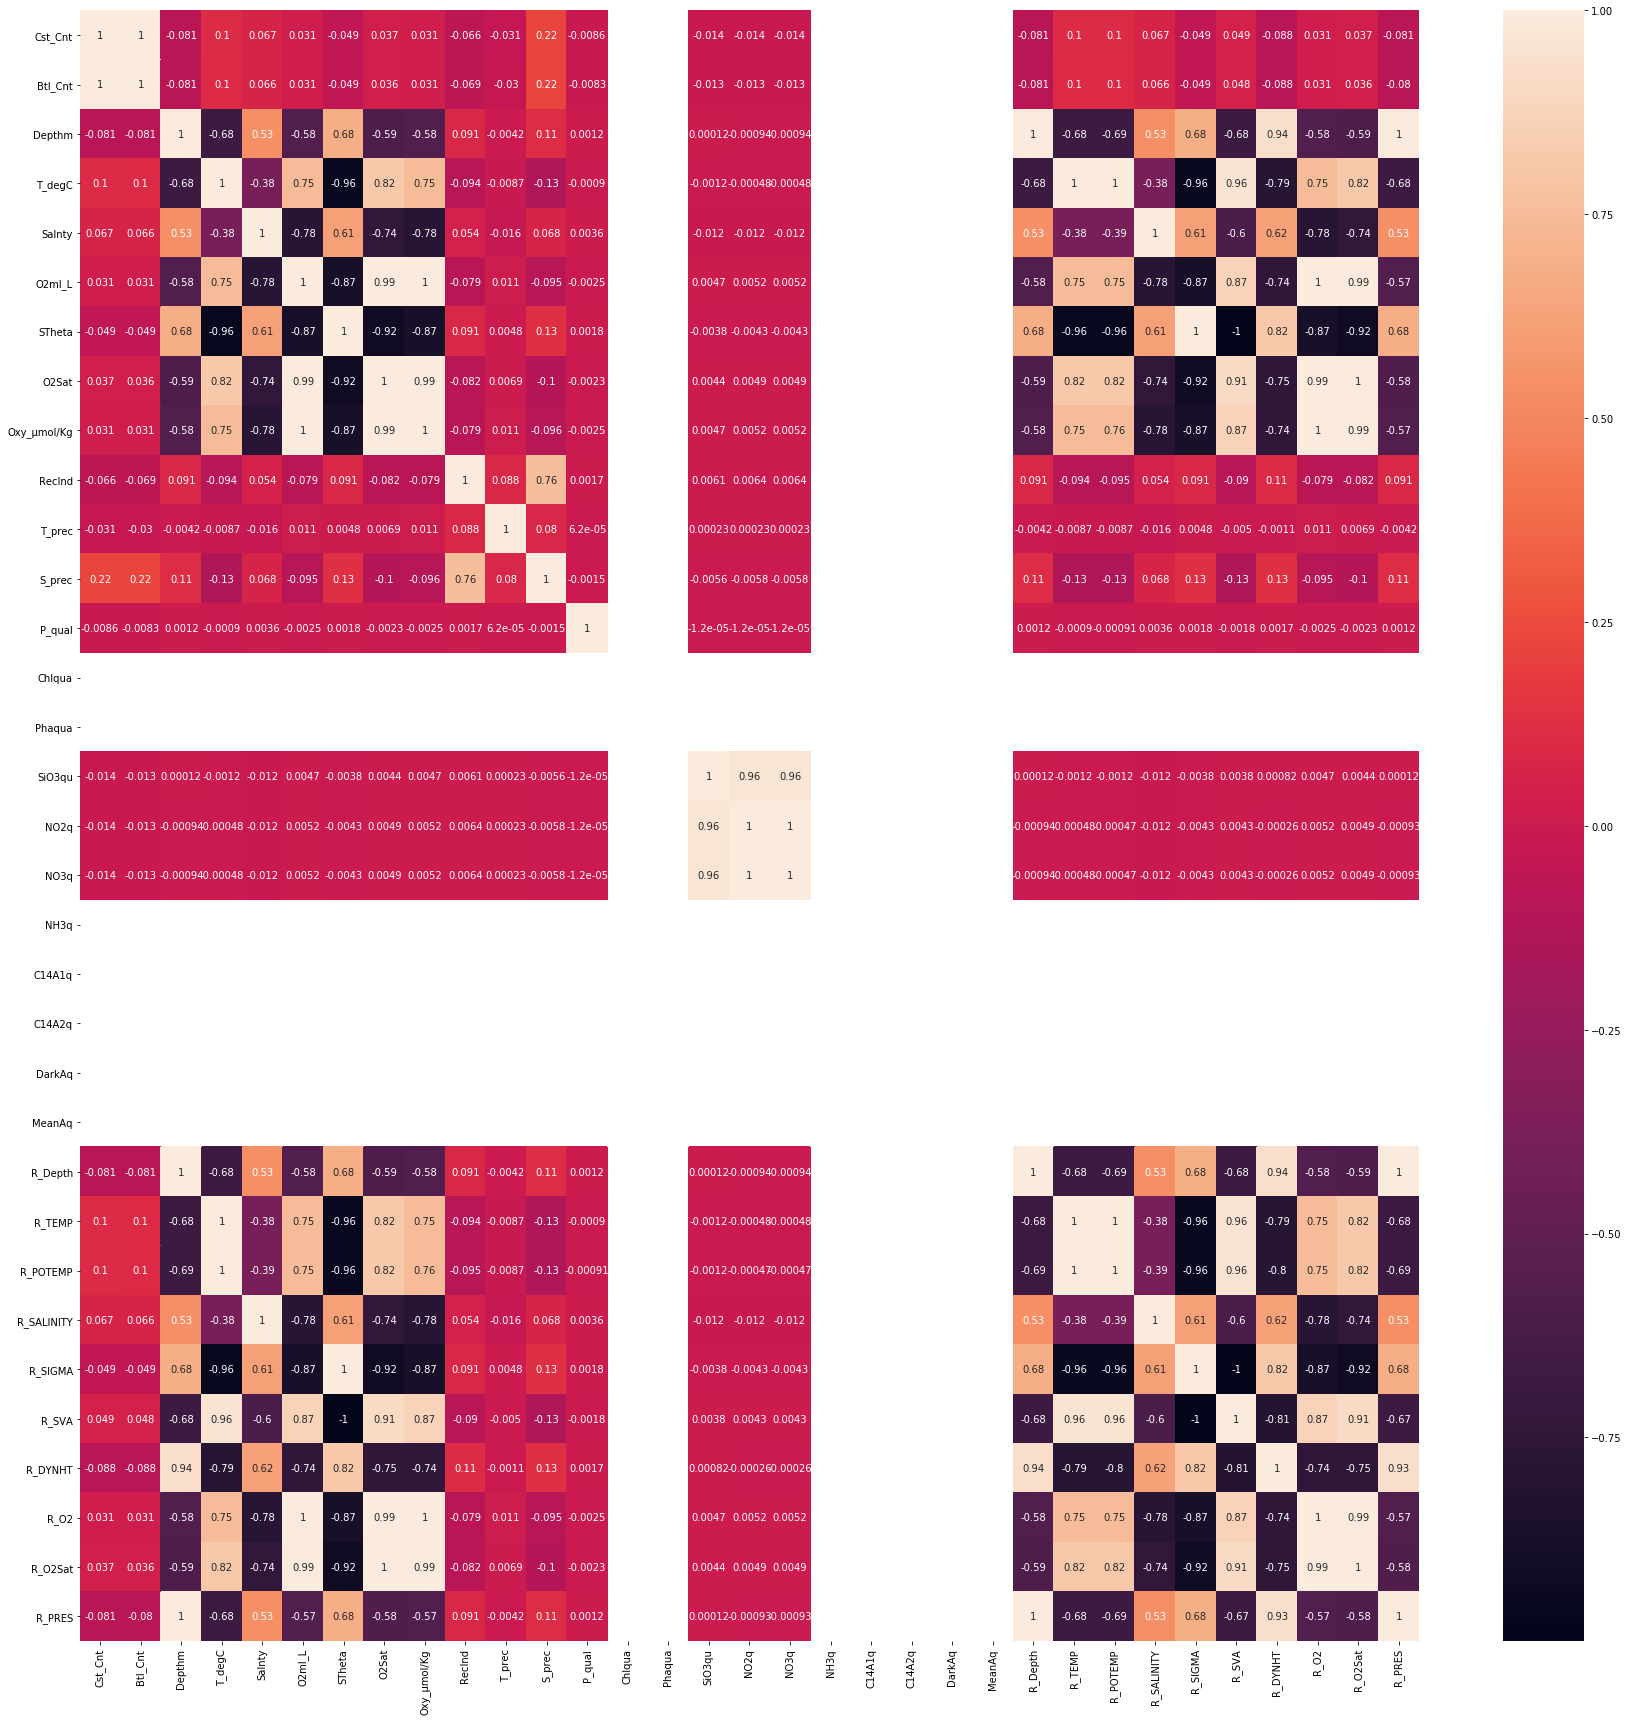

In [13]:
plt.figure(figsize=(30,30))
sns.heatmap(data=cont_features.corr(method='pearson'), annot=True)
plt.show()

### From this correlation matrrix , we have multiple features on which salinity of water is depending.

# Feature Selection
First we have 73 features but after droping features with alot of nan values and object dtype fetaures we left with 33 features. So, we need to select top 10 features which affect Salinty of water maximum

In [14]:
features = cont_features.loc[:, cont_features.columns != 'Salnty']

In [15]:
target = cont_features.loc[:,cont_features.columns=='Salnty']

### For Feature Selection we use Annova function in SelectKBest 
First we import some functions from modules of some packages

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 

In [17]:
bestfeatures = SelectKBest(score_func=f_classif,k=3)

In [18]:
fit = bestfeatures.fit(features,target)
feature_scores = pd.DataFrame(fit.scores_)

C:\Users\SS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SS\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [12 13 17 18 19 20 21] are constant.
  UserWarning)
C:\Users\SS\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [19]:
feature_column_name=pd.DataFrame(features.columns)
feature_score_df = pd.concat([feature_column_name,feature_scores],axis=1)
feature_score_df.columns=['Features','Score']
feature_score_df

,Features,Score
0,Cst_Cnt,1.208999e+01
1,Btl_Cnt,1.236004e+01
2,Depthm,1.107551e+02
3,T_degC,5.888974e+01
4,O2ml_L,3.306844e+02
5,STheta,1.083246e+02
6,O2Sat,2.353544e+02
7,Oxy_µmol/Kg,3.300096e+02
8,RecInd,6.857633e+01
9,T_prec,2.709966e+00


### Top 10 Features with best scores

In [20]:
print(feature_score_df.nlargest(10,'Score'))

       Features         Score
25   R_SALINITY  1.048962e+14
4        O2ml_L  3.306844e+02
29         R_O2  3.306844e+02
7   Oxy_µmol/Kg  3.300096e+02
10       S_prec  2.570657e+02
6         O2Sat  2.353544e+02
30      R_O2Sat  2.353543e+02
28      R_DYNHT  1.409852e+02
2        Depthm  1.107551e+02
22      R_Depth  1.107551e+02


# Model Dataset

In [21]:
model_data = cont_features[['R_SALINITY','O2ml_L','R_O2','Oxy_µmol/Kg','S_prec','O2Sat','R_O2Sat','R_DYNHT','Depthm','R_Depth','Salnty']]
model_data .head(5)

,R_SALINITY,O2ml_L,R_O2,Oxy_µmol/Kg,S_prec,O2Sat,R_O2Sat,R_DYNHT,Depthm,R_Depth,Salnty
2160,33.030,5.90,5.90,256.9761,2.0,92.8,92.8,0.00,0,0.0,33.030
2162,32.951,6.04,6.04,263.0892,3.0,95.0,95.0,0.02,10,10.0,32.951
2163,32.990,6.06,6.06,263.9524,2.0,95.3,95.3,0.04,15,15.0,32.990
2164,33.005,6.04,6.04,263.0802,3.0,95.1,95.1,0.05,20,20.0,33.005
2165,33.054,6.01,6.01,261.7661,3.0,94.8,94.8,0.07,30,30.0,33.054


## Correlation Between Features of the Model Dataset

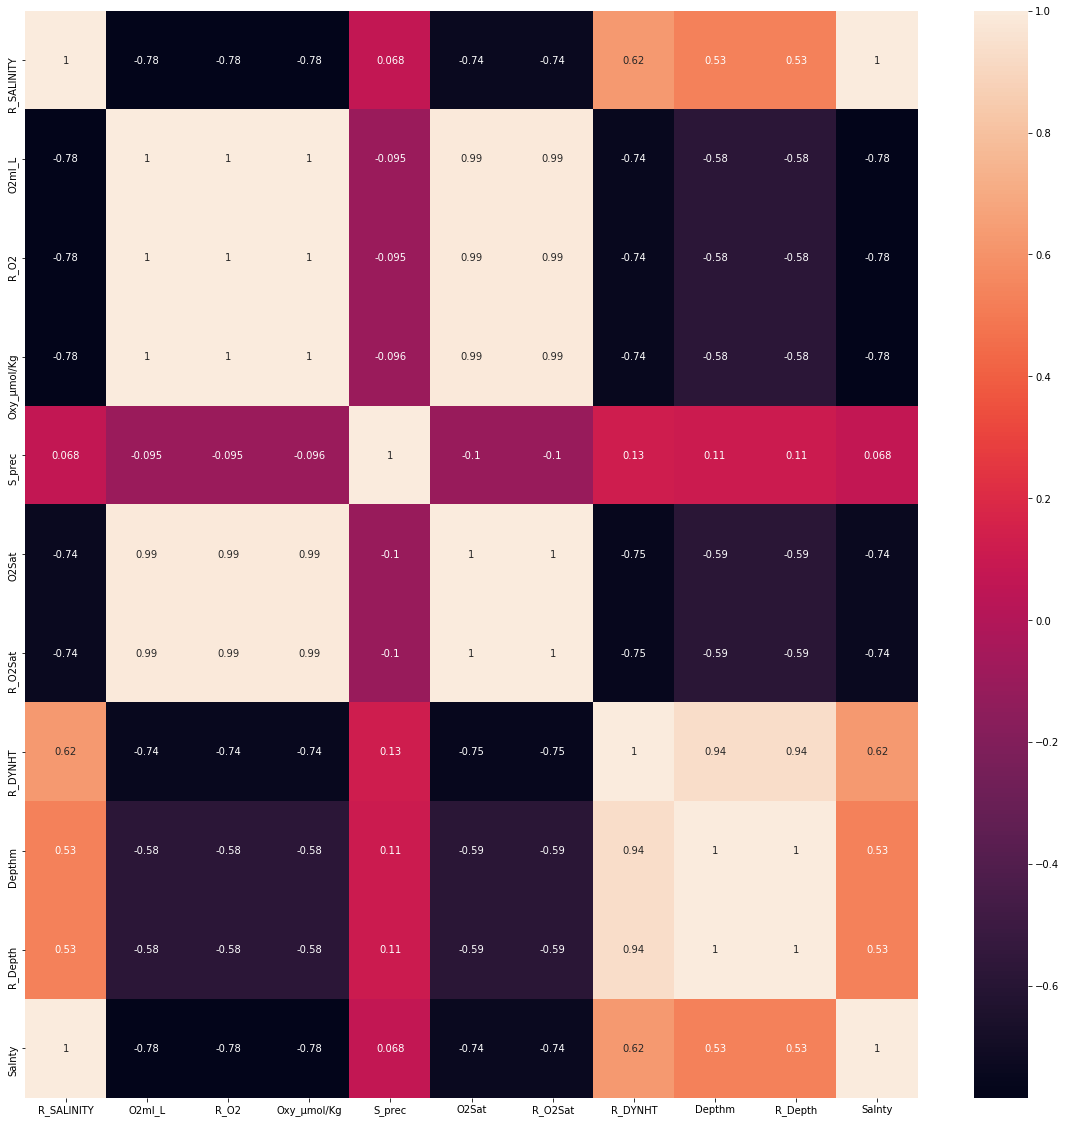

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(data=model_data.corr(), annot=True)

In [23]:
model_data.columns

Index(['R_SALINITY', 'O2ml_L', 'R_O2', 'Oxy_µmol/Kg', 'S_prec', 'O2Sat',
       'R_O2Sat', 'R_DYNHT', 'Depthm', 'R_Depth', 'Salnty'],
      dtype='object')

# Extracting Dependent and Independent Feature from Data set

**There are Many independent features in datasetw hich are highly correlated to eachother. So, we drop those features based on the above correlation matrix.** 

we just take S-prec and Depthm as independent features.

In [24]:
x = model_data[['Oxy_µmol/Kg','S_prec','Depthm']].values

In [25]:
y = model_data['Salnty'].values

In [26]:
print( x[0:5] )
print( f"Shape of Independent(x) variable is { x.shape }" )

[[256.9761   2.       0.    ]
 [263.0892   3.      10.    ]
 [263.9524   2.      15.    ]
 [263.0802   3.      20.    ]
 [261.7661   3.      30.    ]]
Shape of Independent(x) variable is (299536, 3)


In [27]:
print( y[0:5] )
print( f"Shape of Dependent(y) variable is { y.shape }" )

[33.03  32.951 32.99  33.005 33.054]
Shape of Dependent(y) variable is (299536,)


# Data Visualization

Since here we have multiple features on which salinity of water depends. So, we make pair plot which shows scatter plot with continuos features.

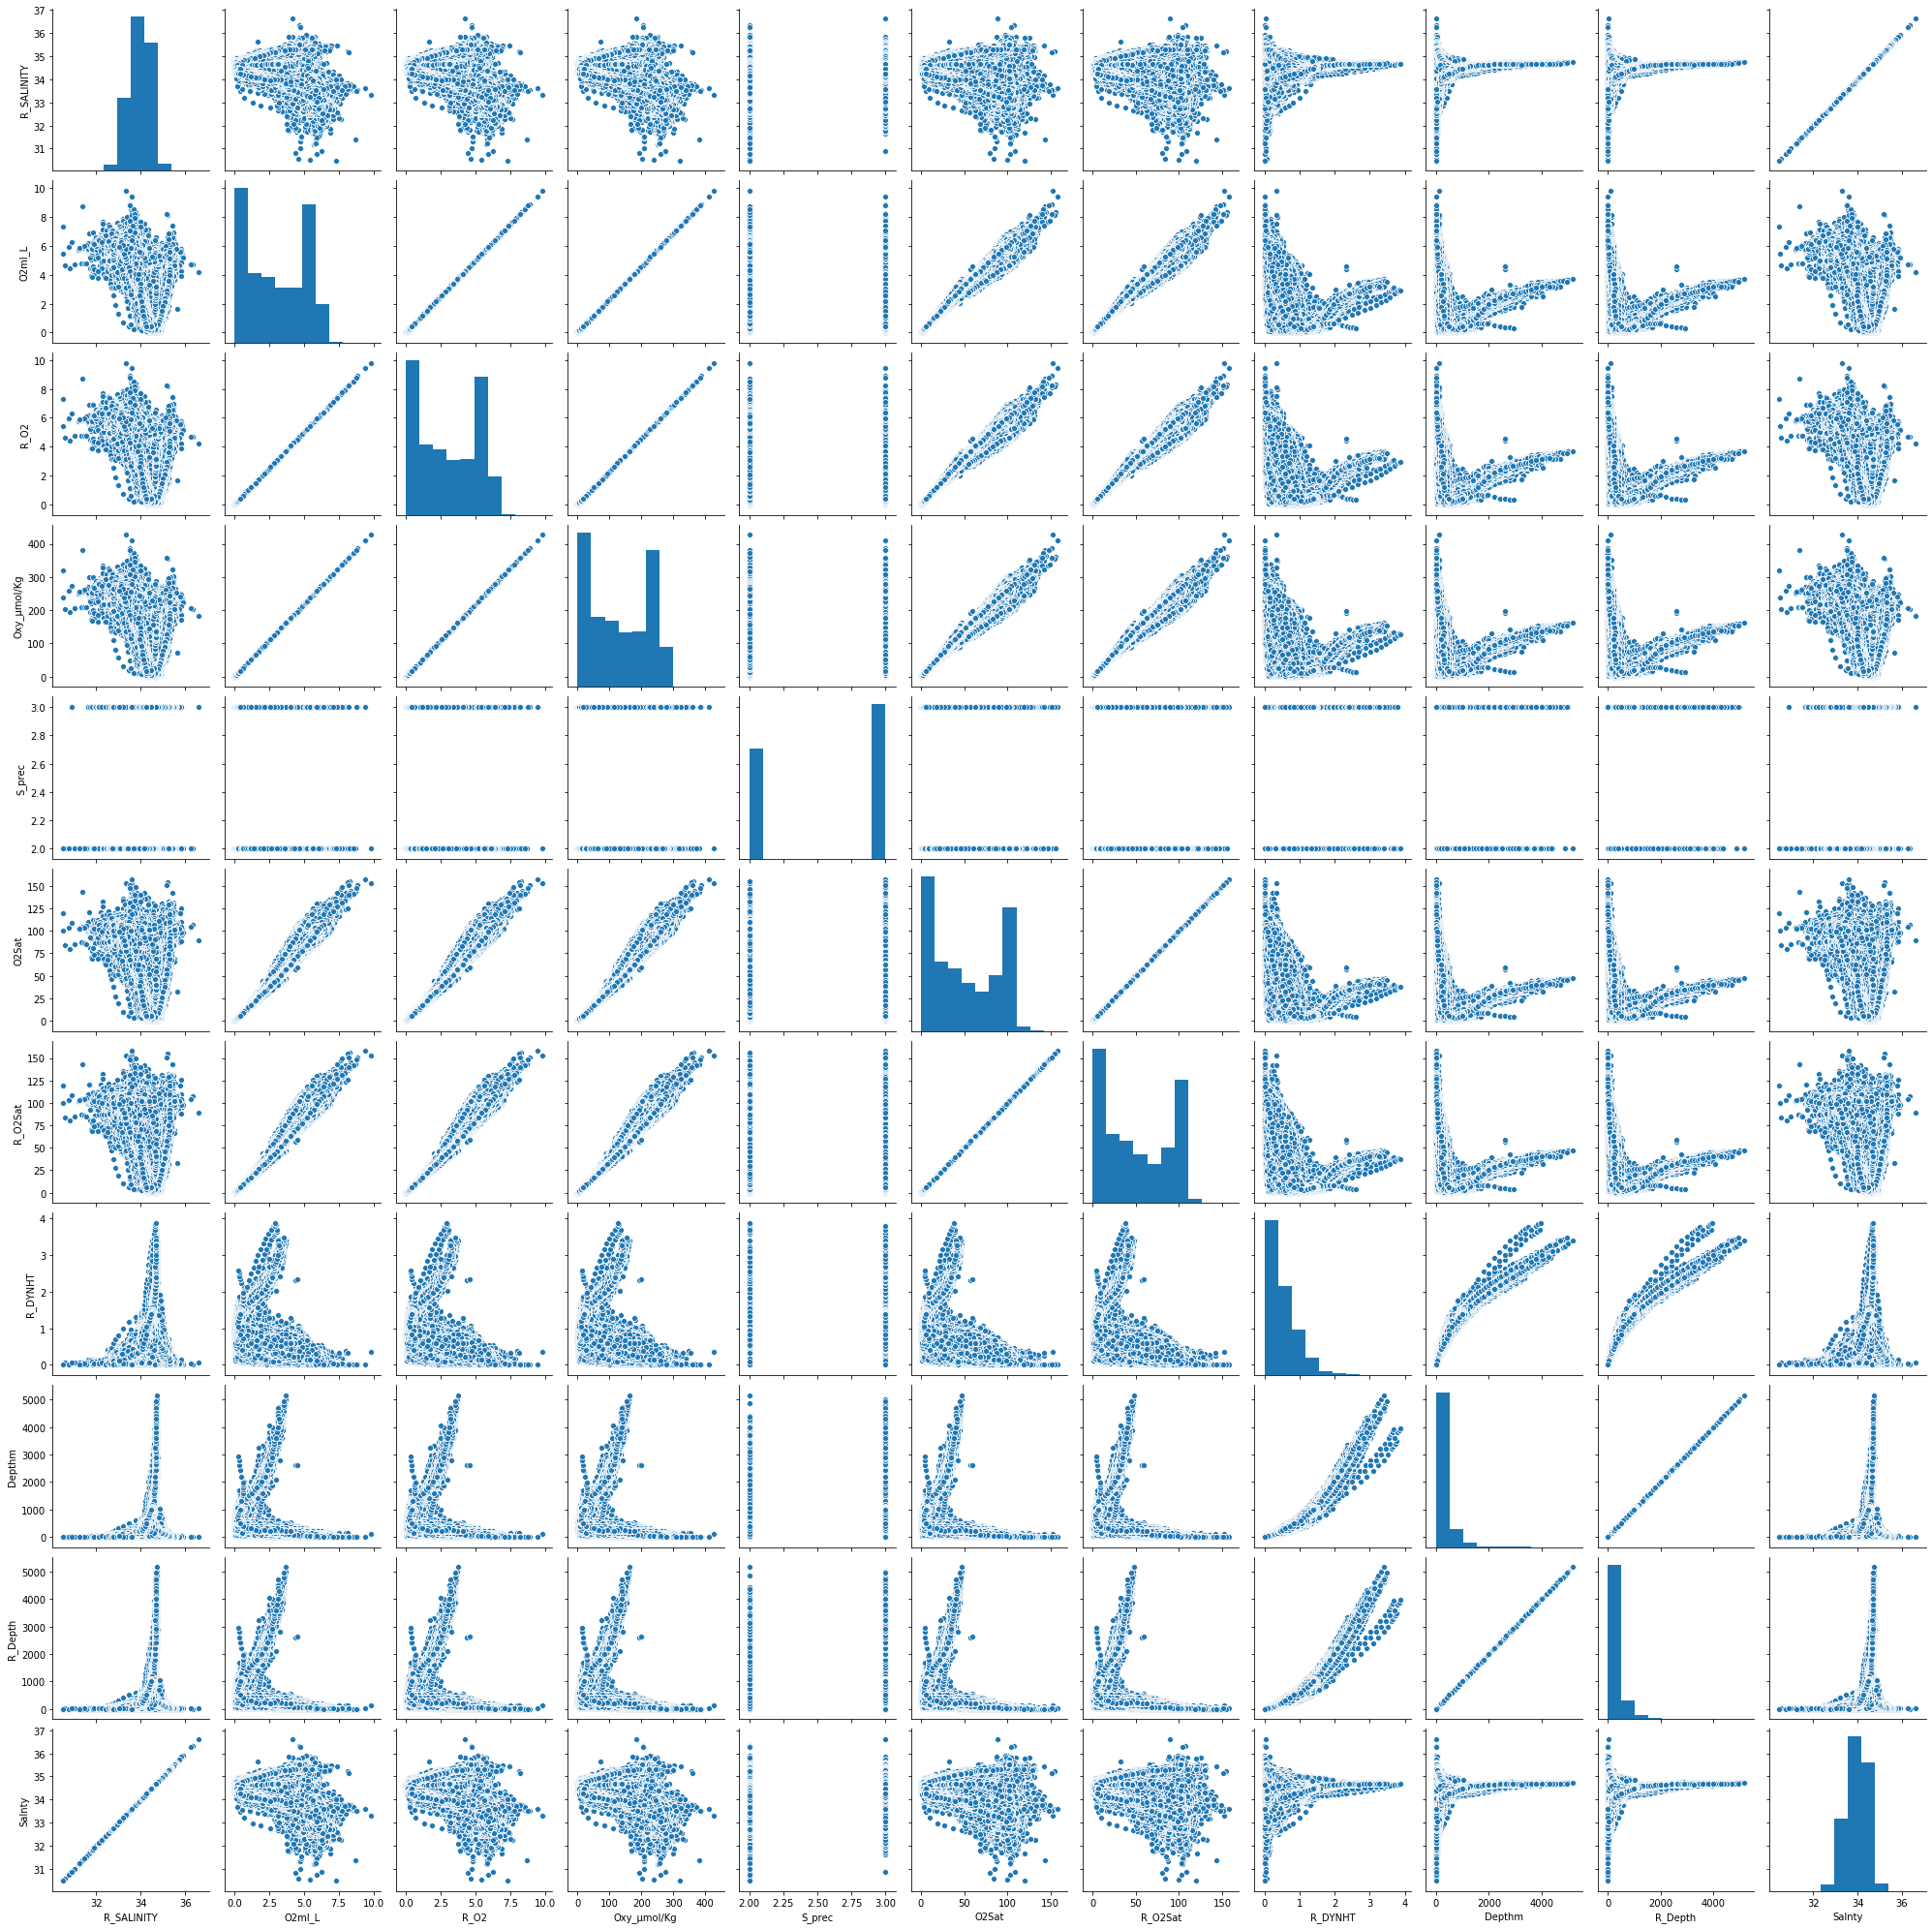

In [28]:
sns.pairplot(model_data)
plt.show()

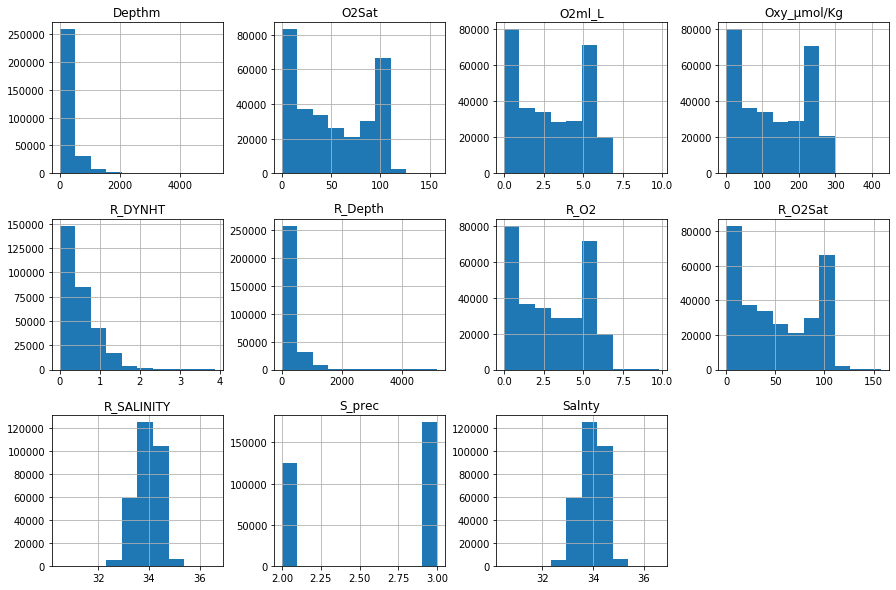

In [29]:
model_data.hist(layout=(3,4),figsize=(15,10))
plt.show()

### Salinity Distribution

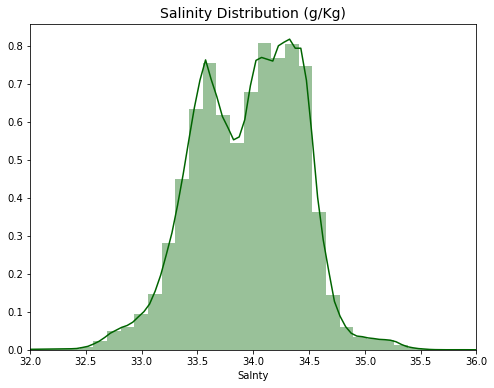

In [30]:
plt.figure(figsize=(8,6))
plt.xlim([32, 36])
plt.title('Salinity Distribution (g/Kg)', fontsize=14)
sns.distplot(model_data['Salnty'], color='darkgreen')
plt.show()

### Histogram

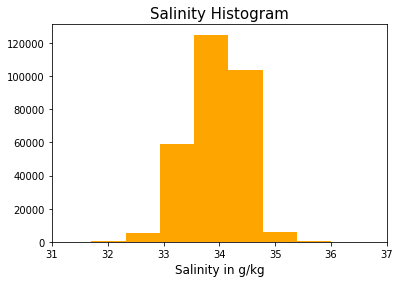

In [31]:
plt.hist(model_data['Salnty'],color='orange')
plt.xlim([31,37])
plt.xlabel("Salinity in g/kg",fontsize=12)
plt.title("Salinity Histogram",fontsize=15)
plt.show()

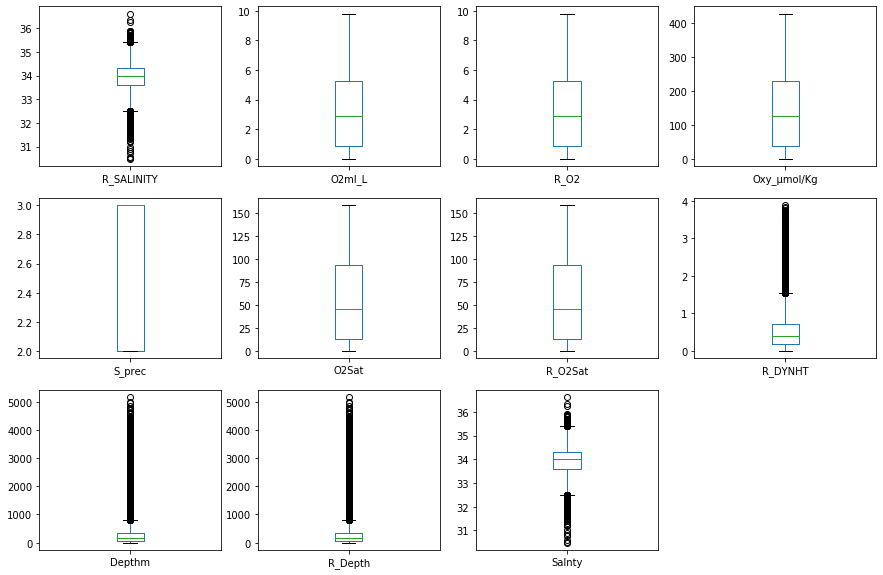

In [32]:
model_data.plot(kind='box',layout=(3,4), subplots=True, figsize=(15,10))
plt.show()

# Model Algorithm Starts

In this model, there are multiple independent features. Also, each independent feature has different range.So, we need to make equal range for all independent features.
Also, there are many features which have many outliers.

To remove these problems, we use **standard scalar** from **preprocessing** module to rescale all features.

In [33]:
x = preprocessing.StandardScaler().fit(x).transform(x) 
x[0:5]

array([[ 1.3594741 , -1.18426212, -0.74314859],
       [ 1.4266359 ,  0.84440765, -0.71524321],
       [ 1.43611948, -1.18426212, -0.70129052],
       [ 1.42653702,  0.84440765, -0.68733782],
       [ 1.41209961,  0.84440765, -0.65943244]])

### Now we split our data in train and test using train_test_split function

In [34]:
train_x , test_x , train_y , test_y = train_test_split( x , y , test_size = 0.25 )

In [35]:
print("Size of Train and Test Varibales. ")
print()
print( f"Size of train_x : {train_x .shape} and test_x : {test_x .shape}" )
print( f"Size of train_y : {train_y .shape} and test_y : {test_y .shape}" )

Size of Train and Test Varibales. 

Size of train_x : (224652, 3) and test_x : (74884, 3)
Size of train_y : (224652,) and test_y : (74884,)


### We import Linear Regression model from linear_model Module

In [36]:
MVLReg = linear_model .LinearRegression() 

### Now we fit MVLReg model using train set

In [37]:
MVLReg .fit( train_x , train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Now MVLReg Model is ready.

We get linear coefficients (Slope) and y-intercept of the Best fit line of the model

In [38]:
print( f"Coefficients are {MVLReg.coef_}" )
print( f"Y-intercept is {MVLReg.intercept_}" )

Coefficients are [-0.33648842 -0.00700533  0.05776538]
Y-intercept is 33.94630558729756


### Predicting Vaues for test_x

In [39]:
pred_y=MVLReg.predict(test_x)

Comparing some values of Actual test y and predicted y.

In [40]:
comp_df = pd.DataFrame({'Actual values':test_y,'Predicted values':pred_y})
comp_df.head()

,Actual values,Predicted values
0,33.930,33.894720
1,33.833,33.971626
2,34.197,34.387990
3,33.800,33.889267
4,34.624,34.370050


# Evaluation of MVLReg Model

Here, we evaluate the model using some error function and score functions

In [41]:
MVLReg.score(train_x,train_y)

0.6250684344991035

In [42]:
r2s = r2_score(test_y,pred_y)
print( f"r2 Score is {r2s}")

r2 Score is 0.6246276230741401


In [43]:
mae = mean_absolute_error(test_y,pred_y)
print( f"Mean Absolute Error is {mae}")

Mean Absolute Error is 0.17915025855697214


In [44]:
mse = mean_squared_error(test_y,pred_y)
print( f"Mean Squared Error is {mse}")

Mean Squared Error is 0.08314507152495913


In [45]:
me = max_error(test_y,pred_y)
print( f"Max Error is {me}")

Max Error is 2.9008645961996393


In [46]:
error_df = pd.DataFrame({'r2 score': r2s , 'Mean Absolute Error' : mae , 'Mean Squared Error' : mse , 'Max Error' : me},index=[0])
error_df

,r2 score,Mean Absolute Error,Mean Squared Error,Max Error
0,0.624628,0.17915,0.083145,2.900865


# Conclusion

### From above table it is clear that r2 score of this model not that good to predict the salinity of the water.

# Artificial Neural Network (ANN)

# We use Keras API for our ANN of Regression

### Importing Libraries for the Neural Network

In [48]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [49]:
# Import input (x) and output (y) data, and asign these to x and y

x = model_data[['Oxy_µmol/Kg','S_prec','Depthm']]
y = model_data['Salnty']

In [50]:
# Split the data into input (x) training and testing data, and ouput (y) training and testing data, 
# with training data being 80% of the data, and testing data being the remaining 20% of the data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [51]:
# Scale both training and testing input data

X_train = preprocessing.scale(X_train)

X_test = preprocessing.scale(X_test)

In [57]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(activation(activation))
    model.add(Dense(1)) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)

In [58]:
model

In [59]:
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation = activations, batch_size = [250, 500], epochs=[5,10,20])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [60]:
grid_result = grid.fit(X_train, y_train)

C:\Users\SS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'str' object is not callable

  FitFailedWarning)


RuntimeError: Cannot clone object <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001D3545F6A48>, as the constructor either does not set or modifies parameter layers

In [ ]:
[grid_result.best_score_,grid_result.best_params_]